## Question 2 

Objectives:
+ Manipulate dataset with data scientist mindset.
  
+ Exposure to real-world dataset analysis.

+ Design computation logic and routines in Python.

+ Structure code in appropriate methods (functions), looping and conditions.

+ Design methods to extract and parse information from the internet.

+ Assess use of Pandas and Dataframes to perform extract, load, transformation and calculation operations.

+ Conduct visualization in an appropriate way.


### Question 2(a)   (15 marks)
Scrape and analyze the list of operational Singapore MRT stations from the 
URL: https://en.wikipedia.org/w/index.php?title=List_of_Singapore_MRT_stations&oldid=1094758210
<br> <br>
Store the scrapped MRT stations into a dataframe with the following fields:

In [1]:
"""
Field                           Description
------                          --------
alpha_numeric_codes             The comma separated string of alphanumeric codes
                                    + Some stations have more than 1 code, e.g. Jurong East station has the value for this field as “NS1, EW24”

name                            The English station name

opening                         The opening date

abbreviation                    The abbreviation of the station

mrt_line                        The MRL line, for example, North South Line (NSL), etc.
"""

'\nField                           Description\n------                          --------\nalpha_numeric_codes             The comma separated string of alphanumeric codes\n                                    + Some stations have more than 1 code, e.g. Jurong East station has the value for this field as “NS1, EW24”\n\nname                            The English station name\n\nopening                         The opening date\n\nabbreviation                    The abbreviation of the station\n\nmrt_line                        The MRL line, for example, North South Line (NSL), etc.\n'

**Note that only operational stations are required to be scrapped. For example, stations with future opening dates or N/A alpha-numeric code(s) are excluded.**

In [30]:
########### Todo 1. ###########
""" The 1st thing to do is import the pandas library and give it an alias of pd. """
import pandas as pd     #import required library and read CSVs datasets

""" The requests module allows you to send HTTP requests using Python. 
https://www.w3schools.com/python/module_requests.asp """
import requests

""" We will import Beautiful Soup with the import statement. For Beautiful Soup, we'll be importing it from bs4, the package in which Beautiful Soup 4 is found. 
https://www.digitalocean.com/community/tutorials/how-to-scrape-web-pages-with-beautiful-soup-and-python-3 """
from bs4 import BeautifulSoup as bs

""" Python has a built-in package called re, which can be used to work with Regular Expressions.
https://www.w3schools.com/python/python_regex.asp """
import re


########### Todo 2. ###########
url = 'https://en.wikipedia.org/wiki/List_of_Singapore_MRT_stations'        # Assign the url to the 'url' variable

########### Todo 3. ###########
""" The get() method sends a GET request to the specified url. 
https://www.w3schools.com/python/ref_requests_get.asp 

To use fake user-agents with Python Requests, you just need to define a user-agent in a headers dictionary and pass it into the headers attribute of your request.
https://scrapeops.io/python-web-scraping-playbook/python-fake-user-agents/ """
data = requests.get(url = url, headers = {'User-Agent': 'Mozilla/5.0'})

########### Todo 4. ###########
# Use BeautifulSoup to parse the page
""" We create a BeautifulSoup object by passing two arguments:
r.content : It is the raw HTML content.
html5lib : Specifying the HTML parser we want to use.
https://www.geeksforgeeks.org/implementing-web-scraping-python-beautiful-soup/ """
soup = bs(data.text, 'html.parser')


########### Todo 5. ###########
""" Assign the 6 empty list to the 6 variables """
code0, name1, open4, abbr6, line99, line99_temp = [], [], [], [], [], []    

########### Todo 6. ###########
count_rowspan = 0       # Assign the '0' value to the 'count_rowspan'


########### Todo 7. ###########
# find table with class 'wikitable sortable'
""" We use the find() method to get one anchor. 
Note that the find_all() method to return a list of all anchors found. 

You should use the .find() method when there is only one element that matches your query criteria, or you just want the first element.
https://scrapeops.io/python-web-scraping-playbook/python-beautifulsoup-find/ """
table = soup.find('table', {'class': 'wikitable sortable'})

# print(table)
""" <table class="wikitable sortable">
<tbody><tr>
<th>Alpha-numeric code(s)</th>
<th colspan="3">Station name</th>
<th rowspan="2">Opening</th>
<th rowspan="2">Name(s) during planning stages
</th>
<th rowspan="2">Abbreviation</th>
<th rowspan="2">Location(s)</th>
<th rowspan="2">Interchange;<br/><small>Adjacent transportation</small>
</th></tr> """


########### Todo 8. ###########
""" You will notice that with the para anchor that we found, there is another <a> anchor which contains a url link. The url link is an attribute of the anchor. Let's extract that.

The find_all method is used for finding out all tags with the specified tag name or id and returning them as a list of type bs4. 
https://www.geeksforgeeks.org/difference-between-find-and-find_all-in-beautifulsoup-python/ """
row_all = table.tbody.find_all('tr')        # Access the <tbody> tag from the <table class="wikitable sortable"> and find all tags with <tr>

# print(row_all)
""" [<tr>
<th>Alpha-numeric code(s)</th>
<th colspan="3">Station name</th>
<th rowspan="2">Opening</th>
<th rowspan="2">Name(s) during planning stages
</th>
<th rowspan="2">Abbreviation</th>
<th rowspan="2">Location(s)</th>
<th rowspan="2">Interchange;<br/><small>Adjacent transportation</small>
</th></tr>, <tr> """


########### Todo 9. ###########
""" You can loop through the list items by using a for loop: 
https://www.w3schools.com/python/python_lists_loop.asp 
https://learnpython.com/blog/python-list-loop/ """
for row in row_all:     # Use a for loop to iterate through the 'row_all' set object using the 'row' variable

    ########### Todo 10. ###########
    """ You will notice that with the para anchor that we found, there is another <a> anchor which contains a url link. The url link is an attribute of the anchor. Let's extract that.

    The find_all method is used for finding out all tags with the specified tag name or id and returning them as a list of type bs4. 
    https://www.geeksforgeeks.org/difference-between-find-and-find_all-in-beautifulsoup-python/ """
    row_curr = row.find_all('td')           # Using the 'row' variable, find all tags with <td>

    # print(row_curr)
    """ []    
    []
    [<td colspan="9" style="text-align:center"><b><a href="/wiki/North%E2%80%93South_MRT_line" title="North-South MRT line"><span style="color:white">North-South Line (NSL)</span></a></b>
    </td>] """
    

    ########### Todo 11. ###########
    # MRL only --> line99 --> 'mrt_line'
    """ The len() function returns the number of items in an object. When the object is a string, the len() function returns the number of characters in the string. 
    https://www.w3schools.com/python/ref_func_len.asp """
    if len(row_curr) == 1:      # Use an if statement to check if the number of items in the 'row_curr' is equal to 1

        ########### Todo 12. ###########
        """ The strip() method removes any leading (spaces at the beginning) and trailing (spaces at the end) characters (space is the default leading character to remove) 
        https://www.w3schools.com/python/ref_string_strip.asp """
        txt_temp = row_curr[0].text.strip()         # Select the 1st element in the 'row_curr' and call 'text' as a property to access the text in the object and use strip() to remove any spaces

        # print(txt_temp)
        """ []
        []
        [<td colspan="9" style="text-align:center"><b><a href="/wiki/North%E2%80%93South_MRT_line" title="North-South MRT line"><span style="color:white">North-South Line (NSL)</span></a></b>
        </td>] """
        
        ########### Todo 13. ###########
        # use regex to keep full MRL only [Interchange]:
        # ^[a-zA-Z\s]+\s\([a-zA-Z]+\)
        """ The search() function searches the string for a match, and returns a Match object if there is a match.
        If there is more than one match, only the first occurrence of the match will be returned: 
        https://www.w3schools.com/python/python_regex.asp#search 
        https://www.guru99.com/python-regular-expressions-complete-tutorial.html 

        The re.MULTILINE search modifier forces the ^ symbol to match at the beginning of each line of text (and not just the first), and the $ symbol to match at the end of each line of text (and not just the last one). 
        https://interactivechaos.com/en/python/function/remultiline
        
        [a-zA-Z] - Match uppercase and lowercase letters 
        \s - Whitespace (space, tab, newline) 
        + - Return 1 or More
        \s - Whitespace (space, tab, newline) 
        ( ) - Group
        [a-zA-Z] - Match uppercase and lowercase letters
        # + - Return 1 or More  """
        if re.search('[a-zA-Z\s\-]+\s\([a-zA-Z]+\)', txt_temp):     # Search the 'txt_temp' list objects for a match of the pattern and returns a Match object if there is a match.

            ########### Todo 14. ###########
            line99_temp.append(txt_temp)        # Append the 'txt_temp' list objects to the 'line99_temp' list

            # print(line99_temp)
            """ ['North-South Line (NSL)']
            ['North-South Line (NSL)', 'East-West Line (EWL)']
            ['North-South Line (NSL)', 'East-West Line (EWL)', 'Changi Airport Branch Line (CAL)']
            ['North-South Line (NSL)', 'East-West Line (EWL)', 'Changi Airport Branch Line (CAL)', 'North East Line (NEL)'] """
            # print("\n")

    
    ########### Todo 15. ###########
    # all other info for df
    # The len() function returns the number of items in an object. When the object is a string, the len() function returns the number of characters in the string.
    # https://www.w3schools.com/python/ref_func_len.asp
    elif len(row_curr) > 1:         # Check if the number of items in the 'row_curr' is greater than 1

        ########### Todo 16. ###########
        # Alpha-numeric code(s) --> code0 --> 'alpha_numeric_codes'
        """ The strip() method removes any leading (spaces at the beginning) and trailing (spaces at the end) characters (space is the default leading character to remove) 
        https://www.w3schools.com/python/ref_string_strip.asp """
        txt_temp = row_curr[0].text.strip()     # Select the 1st element in the 'row_curr' and call 'text' as a property to access the text in the object and use strip() to remove any spaces

        ########### Todo 17. ###########
        # use regex to keep codes only, separate with ',':
        # [A-Z]+[0-9]+[A-Z]?
        """ The findall() will just return the matches as a list of strings. If there is matching groups, then only the groups will be returned. 

        If there are no groups, then it would just return all of the matches in a list of strings. 
        
        [A-Z] - Matches all the uppercase letters
        + - Return 1 or More
        [0-9] - Matches all the digits from 0 to 9
        + - Return 1 or More
        [A-Z] - Matches all the uppercase letters
        ? - Returns 0 or One """
        code0.append(re.findall('[A-Z]+[0-9]+[A-Z]?', txt_temp))    # Search the 'txt_temp' list objects for all of the matches of the pattern as a list of strings which will be added to the 'code0' list
        

        ########### Todo 18. ###########
        # Station name (Eng) --> name1 --> 'name'
        """ The strip() method removes any leading (spaces at the beginning) and trailing (spaces at the end) characters (space is the default leading character to remove) 
        https://www.w3schools.com/python/ref_string_strip.asp """
        txt_temp = row_curr[1].text.strip()     # Select the 2st element in the 'row_curr' and call 'text' as a property to access the text in the object and use strip() to remove any spaces
        

        ########### Todo 19. ###########
        # use regex to keep names only
        # [A-Z][\w\s\-\•]+ for stations with Malay names
        """ The search() function searches the string for a match, and returns a Match object if there is a match.
        If there is more than one match, only the first occurrence of the match will be returned: 
        https://www.w3schools.com/python/python_regex.asp#search 
        https://www.guru99.com/python-regular-expressions-complete-tutorial.html 

        The re.MULTILINE search modifier forces the ^ symbol to match at the beginning of each line of text (and not just the first), and the $ symbol to match at the end of each line of text (and not just the last one). 
        https://interactivechaos.com/en/python/function/remultiline 
        
        [] - Matches Characters in brackets
        \w - Return Word Character (a-z, A-Z, 0-9, _)
        \s - Whitespace (space, tab, newline) 
        \. - The period character in a regular expression has a special meaning, which is to match any single character except for a newline.
        + - Return 1 or More """
        if re.search('[\w\s\-\.]+', txt_temp):      # Check if the pattern matched from the 'txt_temp' list objects returns a Match object if there is a match.
            
            ########### Todo 20. ###########
            """ The split() method splits a string into a list. You can specify the separator, default separator is any whitespace. 
            https://www.w3schools.com/python/ref_string_split.asp
            https://www.programiz.com/python-programming/methods/string/split
            https://www.geeksforgeeks.org/python-string-split/ """
            txt_temp = txt_temp.split('.')[0]       # Split the 'txt_temp' list objects using the delimeter '.' and retrieve the 1st element which will be assigned to the 'txt_temp'

            ########### Todo 21. ###########
            """ The split() method splits a string into a list. You can specify the separator, default separator is any whitespace. 
            https://www.w3schools.com/python/ref_string_split.asp
            https://www.programiz.com/python-programming/methods/string/split
            https://www.geeksforgeeks.org/python-string-split/ """
            txt_temp = txt_temp.split('[')[0]       # Split the 'txt_temp' list objects using the delimeter '[' and retrieve the 1st element which will be assigned to the 'txt_temp'

            ########### Todo 22. ###########
            """ The rstrip() method removes any trailing characters (characters at the end a string), space is the default trailing character to remove.
            https://www.w3schools.com/python/ref_string_rstrip.asp
            https://www.programiz.com/python-programming/methods/string/rstrip """
            name1.append(txt_temp.rstrip())     # Remove trailing characters from the 'txt_temp' list objects and append it to the 'name1' list

            # print(name1)
            """ ['Jurong East']
            ['Jurong East', 'Bukit Batok']
            ['Jurong East', 'Bukit Batok', 'Bukit Gombak']
            ['Jurong East', 'Bukit Batok', 'Bukit Gombak', 'Brickland']
            ['Jurong East', 'Bukit Batok', 'Bukit Gombak', 'Brickland', 'Choa Chu Kang']
            ['Jurong East', 'Bukit Batok', 'Bukit Gombak', 'Brickland', 'Choa Chu Kang', 'Yew Tee']
            ['Jurong East', 'Bukit Batok', 'Bukit Gombak', 'Brickland', 'Choa Chu Kang', 'Yew Tee', 'Sungei Kadut'] """
            # print("\n")


        ########### Todo 23. ###########
        """ The len() function returns the number of items in an object. When the object is a string, the len() function returns the number of characters in the string.
        https://www.w3schools.com/python/ref_func_len.asp """
        if len(row_curr) >= 4:      # Check if the number of items in the 'row_curr' list objects is greater than 1

            ########### Todo 24. ###########
            # Opening --> open4 --> 'opening'
            # Abbreviation --> abbr6 --> 'abbreviation'
            """ The search() function searches the string for a match, and returns a Match object if there is a match.
            If there is more than one match, only the first occurrence of the match will be returned: 
            https://www.w3schools.com/python/python_regex.asp#search 
            https://www.guru99.com/python-regular-expressions-complete-tutorial.html 

            The re.MULTILINE search modifier forces the ^ symbol to match at the beginning of each line of text (and not just the first), and the $ symbol to match at the end of each line of text (and not just the last one). 
            https://interactivechaos.com/en/python/function/remultiline 
            
            The str() function converts the specified value into a string. 
            https://www.w3schools.com/python/ref_func_str.asp 
            
            [0-9] - Matches all the digits from 0 to 9
            + - Return 1 or More  """
            row_span = re.search('rowspan=\"[0-9]+', str(row_curr[4]))  # Search the 'row_curr' list objects 5th element which will be converted into a String for a match of the pattern and returns a Match object if there is a match.

            # print(row_span)
            """ <re.Match object; span=(4, 14), match='rowspan="3'>
            None
            None
            None
            None
            None
            None
            <re.Match object; span=(4, 14), match='rowspan="5'> """
            # print("\n")
            
            
            ########### Todo 25. ###########
            """ We can use logical not operator with Python IF condition. The statements inside if block execute only if the value(boolean) is False or if the value(collection) is not empty. 
            https://pythonexamples.org/python-if-not/
            https://flexiple.com/python/if-not-python/ """
            if not row_span and count_rowspan <= 0:     # Use an if statement to check if the 'row_span' and 'count_rowspan' are not less or equal to 0
                
                ########### Todo 26. ###########
                """ The strip() method removes any leading (spaces at the beginning) and trailing (spaces at the end) characters (space is the default leading character to remove) 
                https://www.w3schools.com/python/ref_string_strip.asp
                
                The split() method splits a string into a list. You can specify the separator, default separator is any whitespace. 
                https://www.w3schools.com/python/ref_string_split.asp
                https://www.programiz.com/python-programming/methods/string/split
                https://www.geeksforgeeks.org/python-string-split/ """
                open4.append(row_curr[4].text.strip().split('[')[0])        # Select the 5th element in the 'row_curr' list objects, call 'text' as a property to access the text in the object and use strip() to remove any spaces and split element using the delimiter '['. Select the 1st element from the element object and append it to the 'open4' list

                ########### Todo 27. ###########
                """ The strip() method removes any leading (spaces at the beginning) and trailing (spaces at the end) characters (space is the default leading character to remove) 
                https://www.w3schools.com/python/ref_string_strip.asp """
                abbr6.append(row_curr[6].text.strip())      # Select the 7th element in the 'row_curr' list objects, call 'text' as a property to access the text in the object and use strip() to remove any spaces

                # print(abbr6)
                """ ['JUR', 'BBT', 'BGB', 'TBA']
                ['JUR', 'BBT', 'BGB', 'TBA', 'CCK']
                ['JUR', 'BBT', 'BGB', 'TBA', 'CCK', 'YWT']
                ['JUR', 'BBT', 'BGB', 'TBA', 'CCK', 'YWT', 'TBA']
                ['JUR', 'BBT', 'BGB', 'TBA', 'CCK', 'YWT', 'TBA', 'KRJ', 'MSL', 'WDL', 'ADM', 'SBW', 'CBR'] """
                # print("\n")
            

            ########### Todo 28. ###########
            elif row_span:      # Check if the 'row_span' object evaluates to True
                
                ########### Todo 29. ###########
                """ The int() function converts the specified value into an integer number.
                https://www.w3schools.com/python/ref_func_int.asp
                
                The str() function converts the specified value into a string. 
                https://www.w3schools.com/python/ref_func_str.asp 
                
                The split() method splits a string into a list. You can specify the separator, default separator is any whitespace. 
                https://www.w3schools.com/python/ref_string_split.asp
                https://www.programiz.com/python-programming/methods/string/split
                https://www.geeksforgeeks.org/python-string-split/

                The replace() method replaces a specified phrase with another specified phrase.
                https://www.w3schools.com/python/ref_string_replace.asp 
                
                Convert the 'row_span' to a String and split the String using the delimiter '"' and retrieve the last element from the list of strings which is the result of split(). 
            
                In the list of strings, replace "'>" with ''. 
                
                Convert the list of strings into an integer which is be subtracted by 1. """
                count_rowspan = int(str(row_span).split('"')[-1].replace("'>", '')) - 1


                ########### Todo 30. ###########
                """ The strip() method removes any leading (spaces at the beginning) and trailing (spaces at the end) characters (space is the default leading character to remove) 
                https://www.w3schools.com/python/ref_string_strip.asp
                 
                The split() method splits a string into a list. You can specify the separator, default separator is any whitespace. 
                https://www.w3schools.com/python/ref_string_split.asp
                https://www.programiz.com/python-programming/methods/string/split
                https://www.geeksforgeeks.org/python-string-split/ """
                open4.append(row_curr[4].text.strip().split('[')[0])        # Select the 5th element in the 'row_curr' list objects, call 'text' as a property to access the text in the object and use strip() to remove any spaces and split the element using the delimiter '['. Select the 1st element from the element object and append it to the 'open4' list

                # print("Display The 'open4' List Values Which Contains The 1st Element From The Element Object: ")
                # print(open4)
                """ ['10 March 1990']
                ['10 March 1990', '10 March 1990', '10 March 1990', 'Mid-2030s', '10 March 1990', '10 February 1996', 'Mid-2030s', '10 February 1996'] """
                # print("\n")


                ########### Todo 31. ###########
                abbr6.append(row_curr[6].text.strip())      #  Select the 7th element in the 'row_curr' list objects, call 'text' as a property to access the text in the object and use strip() to remove any spaces

            
            ########### Todo 32. ###########
            elif count_rowspan > 0:     # Check if the 'count_rowspan' is greater than 0

                ########### Todo 33. ###########
                count_rowspan = count_rowspan - 1       # Decrement the 'count_rowspan' by 1

                ########### Todo 34. ###########
                open4.append(open4[-1])     # Append the last element in the 'open4' list objects to the 'open4' list objects

                ########### Todo 35. ###########
                abbr6.append(row_curr[5].text.strip())      # Retreive the 6th Element in the 'row_curr' list objects, call 'text' as a property to access the text in the object and use strip() to remove any spaces, and append the Element to the 'abbr6' list objects

        ########### Todo 36. ###########
        else:
            open4.append('this row intentionally left blank')       # Append the string to the 'open4' list objects

            ########### Todo 37. ###########
            abbr6.append('this row intentionally left blank')       # Append the string to the 'abbr6' list objects


print("Name Of MRT Lines In A Nested List: ")
print(code0)
""" [['NS1', 'EW24'], ['NS2'], ['NS3'], [], ['NS4', 'BP1'], ['NS5'], [], ['NS7'], ['NS8'], ['NS9', 'TE2'], ['NS10'], ['NS11'], ['NS12'], ['NS13'], ['NS14'], ['NS15'], ['NS16'], ['NS17', 'CC15'], ['NS18'], ['NS19'], ['NS20'], ['NS21', 'DT11'], ['NS22', 'TE14'], ['NS23'], ['NS24', 'NE6', 'CC1'], ['NS25', 'EW13'], ['NS26', 'EW14'], ['NS27', 'CE2', 'TE20'], ['NS28'], ['EW1'] ] """
print("\n")


########### Todo 38. ###########
# clean up data in lists
""" Generally, range(len()) allows you to iterate across a given iterable/sequence to access each item of the sequence with the help of its index.
https://blog.finxter.com/how-to-use-rangelen-in-python/  
https://www.adamsmith.haus/python/answers/how-to-use-range(len())-in-python

You can also loop through the list items by referring to their index number. Use the range() and len() functions to create a suitable iterable.
https://www.w3schools.com/python/python_lists_loop.asp  """
for i in range(len(code0)):     # Use a for loop to loop through the 'code0' list object to access each item with the help of its index

    ########### Todo 39. ###########
    # assign MRL to each station based on alpha-numberic code
    line99.append('')       # Append an empty String object to each list object in the 'line99' list

    # print(line99)
    """ ['']
    ['North-South Line (NSL)', '']
    ['North-South Line (NSL)', 'North-South Line (NSL)', '']
    ['North-South Line (NSL)', 'North-South Line (NSL)', 'North-South Line (NSL)', '']
    ['North-South Line (NSL)', 'North-South Line (NSL)', 'North-South Line (NSL)', '', '']
    ['North-South Line (NSL)', 'North-South Line (NSL)', 'North-South Line (NSL)', '', 'North-South Line (NSL)', ''] """
    # print("\n")

    ########### Todo 40. ###########
    # eg 'NS24, NE6, CC1'
    """ The join() method takes all items in an iterable and joins them into one string. A string must be specified as the separator.
    https://www.w3schools.com/python/ref_string_join.asp
    https://www.programiz.com/python-programming/methods/string/join   """
    code0[i] = ', '.join(code0[i]) # Retrieve each list in the 'code0' list by referring to their index number using the 'i' variable and join each list object using ', ' as the delimiter. Assign the result Elements based on their index number to the code0 list by using the 'i' variable

    # print("Display All The Values From The 'code0' List As A String Using 'i' Variable As The Index: ")
    # print(code0[i])
    """ NS1, EW24
    NS2
    NS3
    NS4, BP1
    NS5
    NS7
    NS8
    NS9, TE2
    NS10
    NS11
    NS12
    NS13
    NS14
    NS15
    NS16
    NS17, CC15 """
    # print("\n")
    

    ########### Todo 41. ###########
    """ You can return a range of characters by using the slice syntax. Specify the start index and the end index, separated by a colon, to return a part of the string. 
    https://www.w3schools.com/python/gloss_python_string_slice.asp
    https://www.digitalocean.com/community/tutorials/how-to-index-and-slice-strings-in-python-3
    https://www.geeksforgeeks.org/string-slicing-in-python/  """
    if code0[i][0:2] == 'NS':       # Use an if statement to check if the 'code0' list items retreived by referring to their index number 1st and 2nd Elements are equal to 'NS'

        ########### Todo 42. ###########
        line99[i] = line99[i] + line99_temp[0]      # The 'code0' list items retreived by referring to their index number is added with the 'line99_temp' list 1st Element

    ########### Todo 43. ###########
    elif code0[i][0:2] == 'EW':     # Also check if the 'code0' list items retreived by referring to their index number 1st and 2nd Elements are equal to 'EW'

        ########### Todo 44. ###########
        line99[i] = line99[i] + line99_temp[1]      # The 'code0' list items retreived by referring to their index number is added with the 'line99_temp' list 2nd Element

    ########### Todo 45. ###########
    elif code0[i][0:2] == 'CG':     # Also check if the 'code0' list items retreived by referring to their index number 1st and 2nd Elements are equal to 'CG'

        ########### Todo 46. ###########
        line99[i] = line99[i] + line99_temp[2]     # The 'code0' list items retreived by referring to their index number is added with the 'line99_temp' list 3rd Element

    ########### Todo 47. ###########
    elif code0[i][0:2] == 'NE':     # Also check if the 'code0' list items retreived by referring to their index number 1st and 2nd Elements are equal to 'NE'

        ########### Todo 48. ###########
        line99[i] = line99[i] + line99_temp[3]     # The 'code0' list items retreived by referring to their index number is added with the 'line99_temp' list 4th Element
    
    ########### Todo 49. ###########
    elif code0[i][0:2] == 'CC':     # Also check if the 'code0' list items retreived by referring to their index number 1st and 2nd Elements are equal to 'CC'

        ########### Todo 50. ###########
        line99[i] = line99[i] + line99_temp[5]     # The 'code0' list items retreived by referring to their index number is added with the 'line99_temp' list 6th Element

    ########### Todo 51. ###########
    elif code0[i][0:2] == 'CE':     # Also check if the 'code0' list items retreived by referring to their index number 1st and 2nd Elements are equal to 'CE'
        
        ########### Todo 52. ###########
        line99[i] = line99[i] + line99_temp[6]     # The 'code0' list items retreived by referring to their index number is added with the 'line99_temp' list 7th Element

    ########### Todo 53. ###########
    elif code0[i][0:2] == 'DT':     # Also check if the 'code0' list items retreived by referring to their index number 1st and 2nd Elements are equal to 'DT'

        ########### Todo 54. ###########
        line99[i] = line99[i] + line99_temp[7]     # The 'code0' list items retreived by referring to their index number is added with the 'line99_temp' list 8th Element

    ########### Todo 55. ###########
    elif code0[i][0:2] == 'TE':     # Also check if the 'code0' list items retreived by referring to their index number 1st and 2nd Elements are equal to 'TE'

        ########### Todo 56. ###########
        line99[i] = line99[i] + line99_temp[8]     # The 'code0' list items retreived by referring to their index number is added with the 'line99_temp' list 9th Element


########### Todo 57. ###########
# define dataframe for all mrt stations
df_mrt = pd.DataFrame(data = {'alpha_numeric_codes': code0, 'name': name1, 'opening': open4, 'abbreviation': abbr6, 'mrt_line': line99}, columns = ['alpha_numeric_codes', 'name', 'opening', 'abbreviation', 'mrt_line'])
print("Display All The Singapore MRT Stations: ")
display(df_mrt)
"""
alpha_numeric_codes	    name	        opening	        abbreviation	mrt_line
0	      NS1, EW24	    Jurong East	    10 March 1990	JUR	            North-South Line (NSL)
1	      NS2	        Bukit Batok	    10 March 1990	BBT	            North-South Line (NSL)
2	      NS3	        Bukit Gombak	10 March 1990	BGB	            North-South Line (NSL)
3		                Brickland	    Mid-2030s	    TBA	
4	      NS4, BP1	    Choa Chu Kang	10 March 1990	CCK	            North-South Line (NSL) """
print("\n")


# drop all rows where 'alpha-numeric codes' == ''
""" List comprehension offers a shorter syntax when you want to create a new list based on the values of an existing list.
https://www.w3schools.com/python/python_lists_comprehension.asp
https://www.geeksforgeeks.org/python-list-comprehension/ """
# lst_todrop = ['' for x in code0]

print("All 'alpha_numeric_codes' Column Values Stored Into The 'code0' List: ")
print(code0)
""" ['NS1, EW24', 'NS2', 'NS3', '', 'NS4, BP1', 'NS5', '', 'NS7', 'NS8', 'NS9, TE2', 'NS10', 'NS11', 'NS12', 'NS13', 'NS14', 'NS15', 'NS16', 'NS17, CC15', 'NS18', 'NS19', 'NS20', 'NS21, DT11', 'NS22, TE14', 'NS23', 'NS24, NE6, CC1', 'NS25, EW13', 'NS26, EW14', 'NS27, CE2, TE20', 'NS28', 'EW1', 'EW2, DT32', 'EW3', 'EW4', 'EW5', 'EW6', 'EW7', 'EW8, CC9', 'EW9', 'EW10', 'EW11', 'EW12, DT14', 'EW13, NS25', 'EW14, NS26', 'EW15', 'EW16, NE3, TE17', 'EW17', 'EW18', 'EW19', 'EW20', 'EW21, CC22', 'EW22', 'EW23', 'EW24, NS1', 'EW25', 'EW26', 'EW27', 'EW28', 'EW29', 'EW30', 'EW31', 'EW32', 'EW33', 'CG1, DT35', 'CG2', 'NE1, CC29', 'EW16, NE3, TE17' 'NE17']  """
print("\n")

########### Todo 58. ###########
lst_todrop = []     # Assign an empty list to the 'lst_todrop'

########### Todo 59. ###########
""" You can loop through the list items by using a for loop: 
https://www.w3schools.com/python/python_lists_loop.asp
https://www.geeksforgeeks.org/iterate-over-a-list-in-python/
https://learnpython.com/blog/python-list-loop/  """
for x in code0:             # Use a for loop to loop through 'code0' list using 'x' 

    ########### Todo 60. ###########
    lst_todrop.append('')       # Append an empty String object to the 'lst_todrop' list

print("lst_todrop List Values: ")
print(lst_todrop)
""" ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''] """
print("\n")


########### Todo 61. ###########
""" Python's Tilde ~n operator is the bitwise negation operator: it takes the number n as binary number and “flips” all bits 0 to 1 and 1 to 0 to obtain the complement binary number. For example, the tilde operation ~1 becomes 0 and ~0 becomes 1 and ~101 becomes 010.
https://blog.finxter.com/tilde-python/#:~:text=The%20Python%20Tilde%20Operator%20(%20~%20),performs%20an%20inversion%20on%20it 
https://www.pythonpool.com/python-tilde/ 

Pandas Filter Rows by Conditions
https://sparkbyexamples.com/pandas/pandas-filter-rows-by-conditions/ 
https://www.geeksforgeeks.org/filter-pandas-dataframe-with-multiple-conditions/ 

Pandas Series.isin() function check whether values are contained in Series. It returns a boolean Series showing whether each element in the Series matches an element in the passed sequence of values exactly. 
https://www.geeksforgeeks.org/python-pandas-series-isin/ """
df_mrt = df_mrt[~df_mrt['alpha_numeric_codes'].isin(lst_todrop)]        # Filter the 'df_mrt' Dataframe to select all rows in the 'alpha_numeric_codes' column that can be found in the  'lst_todrop'. Convert the rows values as binary number and “flips” all bits 0 to 1 and 1 to 0 to obtain the complement binary number.

print("Display All Singapore MRT Stations Found In The 'lst_todrop' List:  ")
display(df_mrt)
""" 
alpha_numeric_codes	 name	        opening	            abbreviation	mrt_line
0	NS1, EW24	     Jurong East	10 March 1990	    JUR	            North-South Line (NSL)
1	NS2	             Bukit Batok	10 March 1990	    BBT	            North-South Line (NSL)
2	NS3	             Bukit Gombak	10 March 1990	    BGB	            North-South Line (NSL)
4	NS4, BP1	     Choa Chu Kang	10 March 1990	    CCK	            North-South Line (NSL)
5	NS5	             Yew Tee	    10 February 1996	YWT	            North-South Line (NSL)
"""
print("\n")

# print(df_mrt.index)
""" Int64Index([  0,   1,   2,   4,   5,   7,   8,   9,  10,  11,
            ...
            203, 213, 218, 221, 224, 226, 228, 230, 234, 235],
           dtype='int64', length=177) """
# print("\n")


########### Todo 62. ###########
""" The index property returns the index information of the DataFrame.
The index information contains the labels of the rows. If the rows has NOT named indexes, the index property returns a RangeIndex object with the start, stop, and step values. 
https://www.w3schools.com/python/pandas/ref_df_index.asp

Generally, range(len()) allows you to iterate across a given iterable/sequence to access each item of the sequence with the help of its index.
https://blog.finxter.com/how-to-use-rangelen-in-python/  
https://www.adamsmith.haus/python/answers/how-to-use-range(len())-in-python

You can also loop through the list items by referring to their index number. Use the range() and len() functions to create a suitable iterable.
https://www.w3schools.com/python/python_lists_loop.asp  """
df_mrt.index = range(len(df_mrt.index))         #  Retreive the index information about the 'df_mrt' Dataframe and retrieve each item by referring to their index number. Assign the result to the 'df_mrt' Dataframe index information object.

print("df_mrt Dataframe Range Of Index Before Filtering For Values In The 'opening' Column That Contains The 'regex_keep' String Pattern Object: ")
print(df_mrt.index)     
""" RangeIndex(start=0, stop=177, step=1) """
print("\n")


# drop all rows with non-standard opening dates
# [0-9]+\s[\w]+\s[0-9]{4}

########### Todo 63. ###########
""" [0-9] - Matches all the digits from 0 to 9
+ - Return 1 or More
\s - Whitespace (space, tab, newline)
\w - Return Word Character (a-z, A-Z, 0-9, _)
[] - Matches Characters in brackets
{4} - Exact Number """
regex_keep = '[0-9]+\s[\w]+\s[0-9]{4}'      # Assign the pattern in the String to 'regex_keep'

########### Todo 64. ###########
""" Pandas Series.str.contains() function is used to test if pattern or regex is contained within a string of a Series or Index. The function returns boolean Series or Index based on whether a given pattern or regex is contained within a string of a Series or Index.
https://www.geeksforgeeks.org/python-pandas-series-str-contains/  """
filter = df_mrt['opening'].str.contains(regex_keep)     # Select the 'opening' column from the 'df_mrt' Dataframe and call the str property to use the contains() to check if the column contains the 'regex_keep' String pattern object.


print("Check If The 'opening' Column Contains The 'regex_keep' String Pattern Object:  ")
print(filter.reset_index())
"""     index  opening
0        0     True
1        1     True
2        2     True
3        3     True
4        4     True
172    172    False
173    173    False
174    174    False
175    175    False
176    176    False """
print("\n")


########### Todo 65. ###########
df_mrt = df_mrt[filter]     # Select the 'filter' variable as a column from the 'df_mrt' Dataframe 
# print("Test:")
# display(df_mrt)
# print("\n")


########### Todo 66. ###########
""" The index property returns the index information of the DataFrame.
The index information contains the labels of the rows. If the rows has NOT named indexes, the index property returns a RangeIndex object with the start, stop, and step values. 
https://www.w3schools.com/python/pandas/ref_df_index.asp

Generally, range(len()) allows you to iterate across a given iterable/sequence to access each item of the sequence with the help of its index.
https://blog.finxter.com/how-to-use-rangelen-in-python/  
https://www.adamsmith.haus/python/answers/how-to-use-range(len())-in-python

You can also loop through the list items by referring to their index number. Use the range() and len() functions to create a suitable iterable.
https://www.w3schools.com/python/python_lists_loop.asp  """
df_mrt.index = range(len(df_mrt.index))         #  Retreive the index information about the 'df_mrt' Dataframe and retrieve each item by referring to their index number. Assign the result to the 'df_mrt' Dataframe index information object.

print("Display The Range Of Index Values From The Operational SG MRT Stations Dataframe: ")
print(df_mrt.index)     
""" RangeIndex(start=0, stop=162, step=1) """
print("\n")


print("All Operational Singapore MRT Dataframe: ")
display(df_mrt)     # Output the 'df_mrt' Dataframe    

Name Of MRT Lines In A Nested List: 
[['NS1', 'EW24'], ['NS2'], ['NS3'], [], ['NS4', 'BP1'], ['NS5'], [], ['NS7'], ['NS8'], ['NS9', 'TE2'], ['NS10'], ['NS11'], ['NS12'], ['NS13'], ['NS14'], ['NS15'], ['NS16'], ['NS17', 'CC15'], ['NS18'], ['NS19'], ['NS20'], ['NS21', 'DT11'], ['NS22', 'TE14'], ['NS23'], ['NS24', 'NE6', 'CC1'], ['NS25', 'EW13'], ['NS26', 'EW14'], ['NS27', 'CE2', 'TE20'], ['NS28'], ['EW1'], ['EW2', 'DT32'], ['EW3'], ['EW4'], ['EW5'], ['EW6'], ['EW7'], ['EW8', 'CC9'], ['EW9'], ['EW10'], ['EW11'], ['EW12', 'DT14'], ['EW13', 'NS25'], ['EW14', 'NS26'], ['EW15'], ['EW16', 'NE3', 'TE17'], ['EW17'], ['EW18'], ['EW19'], ['EW20'], ['EW21', 'CC22'], ['EW22'], ['EW23'], ['EW24', 'NS1'], ['EW25'], ['EW26'], ['EW27'], ['EW28'], ['EW29'], ['EW30'], ['EW31'], ['EW32'], ['EW33'], ['CG1', 'DT35'], ['CG2'], ['NE1', 'CC29'], ['EW16', 'NE3', 'TE17'], ['NE4', 'DT19'], ['NE5'], ['NS24', 'NE6', 'CC1'], ['NE7', 'DT12'], ['NE8'], ['NE9'], ['NE10'], ['NE11'], ['NE12', 'CC13'], ['NE13'], ['NE14'], 

,alpha_numeric_codes,name,opening,abbreviation,mrt_line
0,"NS1, EW24",Jurong East,10 March 1990,JUR,North–South Line (NSL)
1,NS2,Bukit Batok,10 March 1990,BBT,North–South Line (NSL)
2,NS3,Bukit Gombak,10 March 1990,BGB,North–South Line (NSL)
3,,Brickland,Mid-2030s,TBA,
4,"NS4, BP1",Choa Chu Kang,10 March 1990,CCK,North–South Line (NSL)
...,...,...,...,...,...
231,,West Coast,2032,WSC,
232,,Jurong Lake District,2032,JLD,
233,,Elias,2032,PRL,
234,PE4,Riviera,2032,RIV,




All 'alpha_numeric_codes' Column Values Stored Into The 'code0' List: 
['NS1, EW24', 'NS2', 'NS3', '', 'NS4, BP1', 'NS5', '', 'NS7', 'NS8', 'NS9, TE2', 'NS10', 'NS11', 'NS12', 'NS13', 'NS14', 'NS15', 'NS16', 'NS17, CC15', 'NS18', 'NS19', 'NS20', 'NS21, DT11', 'NS22, TE14', 'NS23', 'NS24, NE6, CC1', 'NS25, EW13', 'NS26, EW14', 'NS27, CE2, TE20', 'NS28', 'EW1', 'EW2, DT32', 'EW3', 'EW4', 'EW5', 'EW6', 'EW7', 'EW8, CC9', 'EW9', 'EW10', 'EW11', 'EW12, DT14', 'EW13, NS25', 'EW14, NS26', 'EW15', 'EW16, NE3, TE17', 'EW17', 'EW18', 'EW19', 'EW20', 'EW21, CC22', 'EW22', 'EW23', 'EW24, NS1', 'EW25', 'EW26', 'EW27', 'EW28', 'EW29', 'EW30', 'EW31', 'EW32', 'EW33', 'CG1, DT35', 'CG2', 'NE1, CC29', 'EW16, NE3, TE17', 'NE4, DT19', 'NE5', 'NS24, NE6, CC1', 'NE7, DT12', 'NE8', 'NE9', 'NE10', 'NE11', 'NE12, CC13', 'NE13', 'NE14', 'NE15', 'NE16', 'NE17', '', 'NS24, NE6, CC1', 'CC2', 'CC3', 'CC4, DT15', 'CC5', 'CC6', 'CC7', 'CC8', 'EW8, CC9', 'CC10, DT26', 'CC11', 'CC12', 'NE12, CC13', 'CC14', 'NS17, CC

,alpha_numeric_codes,name,opening,abbreviation,mrt_line
0,"NS1, EW24",Jurong East,10 March 1990,JUR,North–South Line (NSL)
1,NS2,Bukit Batok,10 March 1990,BBT,North–South Line (NSL)
2,NS3,Bukit Gombak,10 March 1990,BGB,North–South Line (NSL)
4,"NS4, BP1",Choa Chu Kang,10 March 1990,CCK,North–South Line (NSL)
5,NS5,Yew Tee,10 February 1996,YWT,North–South Line (NSL)
...,...,...,...,...,...
226,TE7,Bright Hill,2030,BRH,Thomson–East Coast Line (TEL)
228,DT6,King Albert Park,2032,KAP,Downtown Line (DTL)
230,EW23,Clementi,2032,CLE,East–West Line (EWL)
234,PE4,Riviera,2032,RIV,




df_mrt Dataframe Range Of Index Before Filtering For Values In The 'opening' Column That Contains The 'regex_keep' String Pattern Object: 
RangeIndex(start=0, stop=177, step=1)


Check If The 'opening' Column Contains The 'regex_keep' String Pattern Object:  
     index  opening
0        0     True
1        1     True
2        2     True
3        3     True
4        4     True
..     ...      ...
172    172    False
173    173    False
174    174    False
175    175    False
176    176    False

[177 rows x 2 columns]


Display The Range Of Index Values From The Operational SG MRT Stations Dataframe: 
RangeIndex(start=0, stop=162, step=1)


All Operational Singapore MRT Dataframe: 


,alpha_numeric_codes,name,opening,abbreviation,mrt_line
0,"NS1, EW24",Jurong East,10 March 1990,JUR,North–South Line (NSL)
1,NS2,Bukit Batok,10 March 1990,BBT,North–South Line (NSL)
2,NS3,Bukit Gombak,10 March 1990,BGB,North–South Line (NSL)
3,"NS4, BP1",Choa Chu Kang,10 March 1990,CCK,North–South Line (NSL)
4,NS5,Yew Tee,10 February 1996,YWT,North–South Line (NSL)
...,...,...,...,...,...
157,"EW16, NE3, TE17",Outram Park,13 November 2022,OTP,East–West Line (EWL)
158,TE18,Maxwell,13 November 2022,MAX,Thomson–East Coast Line (TEL)
159,TE19,Shenton Way,13 November 2022,SHW,Thomson–East Coast Line (TEL)
160,"NS27, CE2, TE20",Marina Bay,13 November 2022,MRB,North–South Line (NSL)


### Question 2(b)   (5 marks)
On a SINGLE diagram, design and visualize the number of MRT stations per MRT line.

'lst_mrt' List Values That Contains All The Operational 'mrt_line' Column Values: 
['North–South Line (NSL)' 'East–West Line (EWL)'
 'Changi Airport Branch Line (CAL)' 'North East Line (NEL)'
 'Circle Line (CCL)' 'Circle Line Extension (CCLe)' ''
 'Downtown Line (DTL)' 'Thomson–East Coast Line (TEL)']


y_pos:
[0 1 2 3 4 5 6 7 8]


count_station: 


,mrt_line,0
0,North–South Line (NSL),35
1,East–West Line (EWL),39
2,Changi Airport Branch Line (CAL),3
3,North East Line (NEL),18
4,Circle Line (CCL),26
5,Circle Line Extension (CCLe),2
6,,1
7,Downtown Line (DTL),24
8,Thomson–East Coast Line (TEL),14


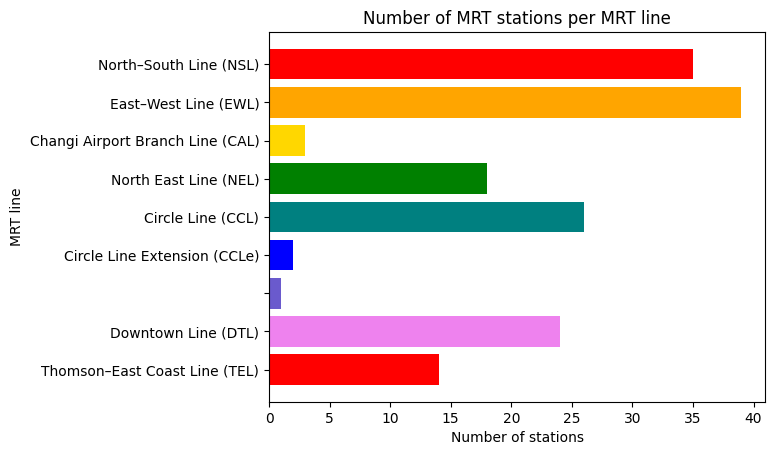

In [28]:
########### Todo 1. ###########
""" Note that you need to include %matplotlib inline in your codes in order to ensure that the graphs can be displayed properly in a Jupyter Notebook cell. """
%matplotlib inline

""" Most of the Matplotlib utilities lies under the pyplot submodule, and are usually imported under the plt alias: Now the Pyplot package can be referred to as plt.
https://www.w3schools.com/python/matplotlib_pyplot.asp """
import matplotlib.pyplot as plt

""" Here, we will import the numpy library so that we can use the np.zeros method to create arrays in this example. 
https://www.w3schools.com/python/numpy/numpy_getting_started.asp """
import numpy as np


########### Todo 2. ###########
""" The rcdefaults() function in pyplot module of matplotlib library is used to restore the rc params from Matplotlib's internal default style.
https://www.geeksforgeeks.org/matplotlib-pyplot-rcdefaults-in-python/
https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.rcdefaults.html  """
plt.rcdefaults()

########### Todo 3. ###########
""" pyplot.subplots creates a figure and a grid of subplots with a single call, while providing reasonable control over how the individual plots are created.  
https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
https://python-course.eu/numerical-programming/creating-subplots-in-matplotlib.php

Parameter:
figsize(float, float): These parameter are the width, height in inches. """
fig, ax = plt.subplots()        # Create a figure and a grid of subplots using variables 'fig' and 'ax'.

########### Todo 4. ###########
lst_color = ['red', 'orange', 'gold', 'green', 'teal', 'blue', 'slateblue', 'violet']   # Assign a list of String colour objects to 'lst_color'


########### Todo 5. ###########
""" While analyzing the data, many times the user wants to see the unique values in a particular column, which can be done using Pandas unique() function.
https://www.geeksforgeeks.org/python-pandas-series-unique/  """
lst_mrt = df_mrt['mrt_line'].unique()       # Select the 'mrt_line' column from the 'df_mrt' and retreive the unique values

print("'lst_mrt' List Values That Contains All The Operational 'mrt_line' Column Values: ")
print(lst_mrt)
""" ['North-South Line (NSL)' 'East-West Line (EWL)'
'Changi Airport Branch Line (CAL)' 'North East Line (NEL)'
'Circle Line (CCL)' 'Circle Line Extension (CCLe)' ''
'Downtown Line (DTL)' 'Thomson-East Coast Line (TEL)'] """
print("\n")


########### Todo 6. ###########
""" The arange([start,] stop[, step,][, dtype]) : Returns an array with evenly spaced elements as per the interval. The interval mentioned is half-opened i.e. [Start, Stop)
https://www.geeksforgeeks.org/numpy-arrange-in-python/

The len() function returns the number of items in an object. When the object is a string, the len() function returns the number of characters in the string.
https://www.w3schools.com/python/ref_func_len.asp    """
y_pos = np.arange(len(lst_mrt))         # Convert the 'lst_mrt' list into an array with evenly spaced elements as per the interval and get the number of items 

print("y_pos:")
print(y_pos)
""" [0 1 2 3 4 5 6 7 8] """
print("\n")


########### Todo 7. ###########
# get number of stations per line
""" The groupby() method allows you to group your data and execute functions on these groups.
https://www.w3schools.com/python/pandas/ref_df_groupby.asp
https://sparkbyexamples.com/pandas/pandas-groupby-explained-with-examples/

Parameters:
sort	True, False: 	Optional, default True. Set to False if the result should NOT sort the group keys (for better performance)

In Python, numpy.size() function count the number of elements along a given axis.
https://www.geeksforgeeks.org/numpy-size-function-python/  """
count_station = df_mrt.groupby('mrt_line', sort = False).size()     # Group the 'df_mrt' by 'mrt_line' and sort by False meaning the result should NOT sort the group keys

print("count_station: ")
display(count_station.reset_index())
""" 
    mrt_line	                        0
0	North-South Line (NSL)	            35
1	East-West Line (EWL)	            39
2	Changi Airport Branch Line (CAL)	3
3	North East Line (NEL)	            18
4	Circle Line (CCL)	                26
5	Circle Line Extension (CCLe)	    2
6		                                1
7	Downtown Line (DTL)	                24
8	Thomson-East Coast Line (TEL)	    14 """
print("\n")


########### Todo 8. ###########
""" Creating a Horizontal bar plot
The matplotlib API in Python provides the barh() function which can be used in MATLAB style use or as an object-oriented API. The syntax of the barh() function to be used with the axes is as follows: 
https://www.geeksforgeeks.org/matplotlib-pyplot-barh-function-in-python/
https://www.pythonpool.com/matplotlib-barh/

Parameters:
y: Co-ordinates of the Y bars.
width: Scalar or array like, denotes the width of the bars.
align: {'center', 'edge'} aligns the base of the Y co-ordinates (default value is center).
color: Scalar or array like, denotes the color of the bars. """
ax.barh(y = y_pos, width = count_station, align = 'center', color = lst_color)  # Create the horizontal bar chart with the respective attributes


########### Todo 9. ###########
""" The Axes.set_yticks() function in axes module of matplotlib library is used to Set the y ticks with list of ticks. 
https://www.geeksforgeeks.org/matplotlib-axes-axes-set_yticks-in-python/
https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_yticks.html#matplotlib.axes.Axes.set_yticks

Parameters: 
ticks: This parameter is the list of y-axis tick locations.
labels: list of str, optional: List of tick labels. If not set, the labels are generated with the axis tick Formatter. """
ax.set_yticks(ticks = y_pos, labels = lst_mrt)      #  Set the y ticks with list of ticks and with labels


########### Todo 10. ###########
""" The Axes.invert_yaxis() function in axes module of matplotlib library is used to invert the y-axis. 
https://www.geeksforgeeks.org/matplotlib-axes-axes-invert_yaxis-in-python/ """
ax.invert_yaxis()       # Invert the y-axis in the graph

########### Todo 11. ###########
""" Set the label for the x-axis for the subplot """
ax.set_xlabel('Number of stations')      

########### Todo 12. ###########
""" Set the label for the y-axis for the subplot """
ax.set_ylabel('MRT line')

########### Todo 13. ###########
""" The Axes.set_title() function in axes module of matplotlib library is used to set a title for the axes. 
https://www.geeksforgeeks.org/matplotlib-axes-axes-set_title-in-python/ """
ax.set_title('Number of MRT stations per MRT line')

########### Todo 14. ###########
""" The show() function in pyplot module of matplotlib library is used to display all figures. 
https://www.geeksforgeeks.org/matplotlib-pyplot-show-in-python/ """
plt.show()

### Question 2(c) (10 marks)
Design and construct a new dataframe to store pairs of stations which are immediately next to each other. 

For example, Orchard and Somerset are immediately next to each other and this relationship is represented by two rows (Orchard, Somerset) and (Somerset, Orchard) in the dataframe.

The dataframe contains the following columns:

In [31]:
""" 
Column                          Description
------                          --------
from                            The abbreviation of the from station

to                              The abbreviation of the to station

mrt_line                        The MRL the edge belongs to
"""

' \nColumn                          Description\n------                          --------\nfrom                            The abbreviation of the from station\n\nto                              The abbreviation of the to station\n\nmrt_line                        The MRL the edge belongs to\n'

**Note that some pairs can be manually added into the dataframe to capture the connection in the real world. However, majority of pairs can be extracted from the scrapped dataframe.**

In [40]:
########### Todo 1. ###########
lst_abbr = df_mrt['abbreviation']       # Select the 'abbreviation' column from the 'df_mrt' Dataframe

########### Todo 2. ###########
lst_line = df_mrt['mrt_line']       # Select the 'mrt_line' column from the 'df_mrt' Dataframe

########### Todo 3. ###########
lst_code_temp = df_mrt['alpha_numeric_codes']   # Select the 'alpha_numeric_codes' column from the 'df_mrt' Dataframe

########### Todo 4. ###########
lst_code = []       # Assign an empty list to 'lst_code'


########### Todo 5. ###########
""" Generally, range(len()) allows you to iterate across a given iterable/sequence to access each item of the sequence with the help of its index.
https://blog.finxter.com/how-to-use-rangelen-in-python/  
https://www.adamsmith.haus/python/answers/how-to-use-range(len())-in-python

You can also loop through the list items by referring to their index number. Use the range() and len() functions to create a suitable iterable.
https://www.w3schools.com/python/python_lists_loop.asp  """
for i in range(len(lst_code_temp)):     # Use a for loop to loop through the 'lst_code_temp' Series to retrieve its items by referring to their index number
    
    ########### Todo 6. ###########
    """ The split() method splits a string into a list. You can specify the separator, default separator is any whitespace. 
    https://www.w3schools.com/python/ref_string_split.asp
    https://www.programiz.com/python-programming/methods/string/split
    https://www.geeksforgeeks.org/python-string-split/
   
    Parameter:
    separator: Optional. Specifies the separator to use when splitting the string. By default any whitespace is a separator """
    str_temp = lst_code_temp[i].split(',')[0]       # Select the 'lst_code_temp' elements by referring to their index number and split the String by using ',' as the delimiter. Retrieve the 1st Element from the list of Strings

    # print(str_temp)
    """ NS1
        NS2
        NS3
        NS4
        NS5
        NS7
        NS8
        NS9
        NS10
        NS11
        NS12
        NS13
        NS14
        NS15
        NS16 """

    ########### Todo 7. ###########
    lst_code.append('')     # Append an empty String object to the 'lst_code' list


    ########### Todo 8. ###########
    """ Generally, range(len()) allows you to iterate across a given iterable/sequence to access each item of the sequence with the help of its index.
    https://blog.finxter.com/how-to-use-rangelen-in-python/  
    https://www.adamsmith.haus/python/answers/how-to-use-range(len())-in-python

    You can also loop through the list items by referring to their index number. Use the range() and len() functions to create a suitable iterable.
    https://www.w3schools.com/python/python_lists_loop.asp  """
    for j in range(len(str_temp)):      # Use a for loop to loop through the 'str_temp' Series to retrieve its items by referring to their index number 

        ########### Todo 9. ###########
        """ The isdigit() method returns True if all the characters are digits, otherwise False.  
        https://www.w3schools.com/python/ref_string_isdigit.asp """
        if str_temp[j].isdigit():       # Use an if statement to check if the elements retreived from 'str_temp' by referring to their index number are digits
            
            ########### Todo 10. ###########
            lst_code[i] = lst_code[i] + str_temp[j]  # The elements retreived from 'lst_code' by referring to their index number will be added with the elements retreived from 'str_temp' by referring to their index number will be added. The resulting String object will be added to 'lst_code' list that retrieves its elements by referring to their index number
    
    
    ########### Todo 11. ###########
    """ The int() function converts the specified value into an integer number. 
    https://www.w3schools.com/python/ref_func_int.asp """
    lst_code[i] = int(lst_code[i])      # Retrive the elements from 'lst_code' by referring to their index number and convert the String object into an integer

    # print(lst_code)
    """ [1]
        [1, 2]
        [1, 2, 3]
        [1, 2, 3, 4]
        [1, 2, 3, 4, 5]
        [1, 2, 3, 4, 5, 7]
        [1, 2, 3, 4, 5, 7, 8]
        [1, 2, 3, 4, 5, 7, 8, 9]
        [1, 2, 3, 4, 5, 7, 8, 9, 10]
        [1, 2, 3, 4, 5, 7, 8, 9, 10, 11]
        [1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12]
        [1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13]
        [1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14]
        [1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15]
        [1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16] """


########### Todo 12. ###########
lst_from, lst_to, lst_mrt = [], [], []      # Assign the 3 empty list to the 3 variables


########### Todo 13. ###########
""" Generally, range(len()) allows you to iterate across a given iterable/sequence to access each item of the sequence with the help of its index.
https://blog.finxter.com/how-to-use-rangelen-in-python/  
https://www.adamsmith.haus/python/answers/how-to-use-range(len())-in-python

You can also loop through the list items by referring to their index number. Use the range() and len() functions to create a suitable iterable.
https://www.w3schools.com/python/python_lists_loop.asp  """
for k in range(len(lst_code)):          # Use a for loop to loop through the 'lst_code' list objects to retrieve its items by referring to their index number

    ########### Todo 14. ###########
    """ The len() function returns the number of items in an object. When the object is a string, the len() function returns the number of characters in the string. """
    if k < len(lst_code) - 1:       # Check if the 'k' is less than the number of items in the 'lst_code' list and subtract by 1
        
        ########### Todo 15. ###########
        """ Check if elements from the 'lst_code' retreived by referring to their index number which is incremented by 1 is equal to elements from the 'lst_code' retreived by referring to their index number and the element is added with 1.    """
        if lst_code[k + 1] == lst_code[k] + 1:

            ########### Todo 16. ###########
            lst_from.append(lst_abbr[k])        # Append to the 'lst_from' list elements from the 'lst_abbr' Series  retreived by referring to their index number

            ########### Todo 17. ###########
            lst_to.append(lst_abbr[k + 1])      # Append the 'lst_abbr' elements retreived by referring to their index number which is incremented by 1 to the 'lst_to' list

            ########### Todo 18. ###########
            lst_mrt.append(lst_line[k])     # Append the 'lst_line' elements retreived by referring to their index number 


print("'lst_from' List Values That Contains All From Stations: ")
print(lst_from)
""" ['JUR', 'BBT', 'BGB', 'CCK', 'KRJ', 'MSL', 'WDL', 'ADM', 'SBW', 'CBR', 'YIS', 'KTB', 'YCK', 'AMK', 'BSH', 'BDL', 'TAP', 'NOV', 'NEW', 'ORC', 'SOM', 'DBG', 'CTH', 'RFP', 'MRB', 'PSR', 'TAM', 'SIM', 'TNM', 'BDK', 'KEM', 'EUN', 'PYL', 'ALJ', 'KAL', 'LVR', 'BGS', 'CTH', 'RFP', 'TPG', 'OTP', 'TIB', 'RDH', 'QUE', 'COM', 'BNV', 'DVR', 'CLE', 'JUR', 'CNG', 'LKS', 'BNL', 'PNR', 'JKN', 'GCL', 'TCR', 'TWR', 'XPO', 'CNT', 'LTI', 'FRP', 'BNK', 'PTP', 'WLH', 'SER', 'KVN', 'HGN', 'BGK', 'SKG', 'BBS', 'EPN', 'PMN', 'NCH', 'SDM', 'MBT', 'MPS', 'TSG', 'MRM', 'BTN', 'FRR', 'ONH', 'KRG', 'HPV', 'PPJ', 'LBD', 'CSW', 'BTW', 'KAP', 'SAV', 'DTN', 'FCN', 'BCL', 'JLB', 'BDM', 'GLB', 'UBI', 'KKB', 'BDN', 'BDR', 'TPE', 'WDS', 'SPL', 'LTR', 'MFL', 'BRH', 'NPR', 'GRW', 'MAX'] """

print("\n")

print("'lst_to' List Values That Contains All To Stations: ")
print(lst_to)
""" ['BBT', 'BGB', 'CCK', 'YWT', 'MSL', 'WDL', 'ADM', 'SBW', 'CBR', 'YIS', 'KTB', 'YCK', 'AMK', 'BSH', 'BDL', 'TAP', 'NOV', 'NEW', 'ORC', 'SOM', 'DBG', 'CTH', 'RFP', 'MRB', 'MSP', 'TAM', 'SIM', 'TNM', 'BDK', 'KEM', 'EUN', 'PYL', 'ALJ', 'KAL', 'LVR', 'BGS', 'CTH', 'RFP', 'TPG', 'OTP', 'TIB', 'RDH', 'QUE', 'COM', 'BNV', 'DVR', 'CLE', 'JUR', 'CNG', 'LKS', 'BNL', 'PNR', 'JKN', 'GCL', 'TCR', 'TWR', 'TLK', 'CGA', 'CQY', 'FRP', 'BNK', 'PTP', 'WLH', 'SER', 'KVN', 'HGN', 'BGK', 'SKG', 'PGL', 'EPN', 'PMN', 'NCH', 'SDM', 'MBT', 'DKT', 'TSG', 'BLY', 'CDT', 'FRR', 'HLV', 'KRG', 'HPV', 'PPJ', 'LBD', 'TLB', 'HVW', 'KAP', 'SAV', 'TKK', 'TLA', 'BCL', 'JLB', 'BDM', 'GLB', 'MTR', 'KKB', 'BDN', 'BDR', 'TPW', 'UPC', 'SPL', 'LTR', 'MFL', 'BRH', 'UTS', 'OBV', 'HVL', 'SHW'] """

print("\n")

print("'lst_mrt' List Values That Contains All To MRT Lines That The Edge Belongs To: ")
print(lst_mrt)
""" ['North-South Line (NSL)', 'North-South Line (NSL)', 'North-South Line (NSL)', 'North-South Line (NSL)', 'North-South Line (NSL)', 'North-South Line (NSL)', 'North-South Line (NSL)', 'North-South Line (NSL)', 'North-South Line (NSL)', 'North-South Line (NSL)', 'North-South Line (NSL)', 'North-South Line (NSL)', 'North-South Line (NSL)', 'North-South Line (NSL)', 'North-South Line (NSL)', 'North-South Line (NSL)', 'North-South Line (NSL)', 'North-South Line (NSL)', 'North-South Line (NSL)', 'North-South Line (NSL)', 'North-South Line (NSL)', 'North-South Line (NSL)', 'North-South Line (NSL)', 'North-South Line (NSL)', 'North-South Line (NSL)', 'Thomson-East Coast Line (TEL)'] """

print("\n")
print("\n")


########### Todo 19. ###########
""" Generally, range(len()) allows you to iterate across a given iterable/sequence to access each item of the sequence with the help of its index.
https://blog.finxter.com/how-to-use-rangelen-in-python/  
https://www.adamsmith.haus/python/answers/how-to-use-range(len())-in-python

You can also loop through the list items by referring to their index number. Use the range() and len() functions to create a suitable iterable.
https://www.w3schools.com/python/python_lists_loop.asp

https://chat.openai.com/  

This line of code initiates a for loop that iterates over a range of numbers in reverse order, from the length of lst_code to 1, with a step of -1. 

The variable j takes the value of each number in the range during each iteration of the loop.

The len(lst_code) function returns the length of lst_code, which is the number of elements in the list. The loop starts at the last index of the list (which is len(lst_code) minus 1), and continues until it reaches the first index (which is 0). The range function generates a sequence of numbers that starts at the first argument, ends at the second argument (exclusive), and steps by the third argument. 

In summary, this line of code allows you to iterate over the elements of lst_code in reverse order. """
for j in range(len(lst_code), 0, -1):

    ########### Todo 20. ###########
    if j > 0:   # Check if the 'j' is greater than 0
        
        ########### Todo 22. ###########
        """ This line of code is checking if the element at the index j - 2 in the lst_code list is equal to the element at index j - 1 minus 1. 
        
        In other words, it is checking if the current element in the list (lst_code[j - 1]) is one more than the previous element (lst_code[j - 2])
        
        If the condition is true, then the code inside the if statement will execute.

        The j variable is defined in the previous line using a for loop that iterates over the elements of the lst_code list in reverse order.

        So, for each iteration of the loop, the condition is checking if the current element is one more than the previous element in the list. If the condition is true, then the code inside the if statement will execute.
        https://chat.openai.com/  """
        if lst_code[j - 2] == lst_code[j - 1] - 1:     
            
            ########### Todo 23. ###########
            lst_from.append(lst_abbr[j - 1])        # Append the 'lst_abbr' Series Element at the index j - 1 to the 'lst_from' list

            ########### Todo 24. ###########
            lst_to.append(lst_abbr[j - 2])       # Append the 'lst_abbr' Series Element at the index j - 2 to the 'lst_to' list

            ########### Todo 25. ###########
            lst_mrt.append(lst_line[j - 1])     # Append the 'lst_line' Series Element at the index j - 1 to the 'lst_mrt' list


print("'lst_from' List Values That Contains The Filtered From Stations: ")
print(lst_from)
""" ['JUR', 'BBT', 'BGB', 'CCK', 'KRJ', 'MSL', 'WDL', 'ADM', 'SBW', 'CBR', 'YIS', 'KTB', 'YCK', 'AMK', 'BSH', 'BDL', 'TAP', 'NOV', 'NEW', 'ORC', 'SOM', 'DBG', 'CTH', 'RFP', 'MRB', 'PSR', 'TAM', 'SIM', 'TNM', 'BDK', 'KEM', 'EUN', 'PYL', 'ALJ', 'KAL', 'LVR', 'BGS', 'CTH', 'RFP', 'TPG', 'OTP', 'TIB', 'RDH', 'QUE', 'COM', 'BNV', 'DVR', 'CLE', 'JUR', 'CNG', 'LKS', 'BNL', 'PNR', 'JKN', 'GCL', 'TCR', 'TWR', 'XPO', 'CNT', 'LTI', 'FRP', 'BNK', 'PTP', 'WLH', 'SER',  'BBT'] """

print("\n")


print("'lst_to' List Values That Contains The Filtered To Stations: ")
print(lst_to)
""" ['BBT', 'BGB', 'CCK', 'YWT', 'MSL', 'WDL', 'ADM', 'SBW', 'CBR', 'YIS', 'KTB', 'YCK', 'AMK', 'BSH', 'BDL', 'TAP', 'NOV', 'NEW', 'ORC', 'SOM', 'DBG', 'CTH', 'RFP', 'MRB', 'MSP', 'TAM', 'SIM', 'TNM', 'BDK', 'KEM', 'EUN', 'PYL', 'ALJ', 'KAL', 'LVR', 'BGS', 'CTH', 'RFP', 'TPG', 'OTP', 'TIB', 'RDH', 'QUE', 'COM', 'BNV', 'DVR', 'CLE', 'JUR', 'CNG', 'LKS', 'BNL', 'PNR', 'JKN', 'GCL', 'TCR', 'TWR', 'TLK', 'CGA', 'CQY', 'FRP', 'BNK', 'PTP', 'WLH', 'SER', 'KVN',  'JUR'] """

print("\n")


print("'lst_mrt' List Values That Contains The Filtered MRT Lines The Edge Belongs To: ")
print(lst_mrt)
""" ['North-South Line (NSL)', 'North-South Line (NSL)', 'North-South Line (NSL)', 'North-South Line (NSL)', 'North-South Line (NSL)', 'North-South Line (NSL)', 'North-South Line (NSL)', 'North-South Line (NSL)', 'North-South Line (NSL)', 'North-South Line (NSL)', 'North-South Line (NSL)', 'North-South Line (NSL)'] """

print("\n")


########### Todo 26. ###########
""" We have a function that takes 3 argument """
def add_pair_manually(station1, station2, mrtline):

    ########### Todo 27. ###########
    lst_from.append(station1)       # Append the 'station1' to the 'lst_from' list

    ########### Todo 28. ###########
    lst_from.append(station2)       # Append the 'station2' to the 'lst_from' list


    ########### Todo 29. ###########
    lst_to.append(station2)         # Append the 'station2' to the 'lst_to' list

    ########### Todo 30. ###########
    lst_to.append(station1)         # Append the 'station1' to the 'lst_to' list


    ########### Todo 31. ###########
    lst_mrt.append(mrtline)         # Append the 'mrtline' to the 'lst_mrt' list

    ########### Todo 32. ###########
    lst_mrt.append(mrtline)         # Append the 'mrtline' to the 'lst_mrt' list


########### Todo 33. ###########
"""" Call the function 'add_pair_manually' multiple times with the following attributes

Keyword arguments (or named arguments) are values that, when passed into a function, are identifiable by specific parameter names.  
https://www.educative.io/answers/what-are-keyword-arguments-in-python  """
add_pair_manually(station1 = 'YWT', station2 = 'KRJ', mrtline = 'Nouth South Line (NSL)')
add_pair_manually(station1 = 'HBF', station2 = 'OTP', mrtline = 'North East Line (NEL)')
add_pair_manually(station1 = 'HVW', station2 = 'BTW', mrtline = 'Downtown Line (DTL)')
add_pair_manually(station1 = 'XPO', station2 = 'TNM', mrtline = 'Changi Airport Branch Line (CAL)')
add_pair_manually(station1 = 'CDT', station2 = 'BTN', mrtline = 'Circle Line (CCL)')


########### Todo 34. ###########
# define dataframe to store pairs of stations which are immediately next to each other
df_pair = pd.DataFrame(data = {'from': lst_from, 'to': lst_to, 'mrt_line': lst_mrt}, columns = ['from', 'to', 'mrt_line'])

print("Dataframe To Store Pairs Of Stations Which Are Immediately Next To Each Other: ")
display(df_pair)

'lst_from' List Values That Contains All From Stations: 
['JUR', 'BBT', 'BGB', 'CCK', 'KRJ', 'MSL', 'WDL', 'ADM', 'SBW', 'CBR', 'YIS', 'KTB', 'YCK', 'AMK', 'BSH', 'BDL', 'TAP', 'NOV', 'NEW', 'ORC', 'SOM', 'DBG', 'CTH', 'RFP', 'MRB', 'PSR', 'TAM', 'SIM', 'TNM', 'BDK', 'KEM', 'EUN', 'PYL', 'ALJ', 'KAL', 'LVR', 'BGS', 'CTH', 'RFP', 'TPG', 'OTP', 'TIB', 'RDH', 'QUE', 'COM', 'BNV', 'DVR', 'CLE', 'JUR', 'CNG', 'LKS', 'BNL', 'PNR', 'JKN', 'GCL', 'TCR', 'TWR', 'XPO', 'CNT', 'LTI', 'FRP', 'BNK', 'PTP', 'WLH', 'SER', 'KVN', 'HGN', 'BGK', 'SKG', 'BBS', 'EPN', 'PMN', 'NCH', 'SDM', 'MBT', 'MPS', 'TSG', 'MRM', 'BTN', 'FRR', 'ONH', 'KRG', 'HPV', 'PPJ', 'LBD', 'CSW', 'BTW', 'KAP', 'SAV', 'DTN', 'FCN', 'BCL', 'JLB', 'BDM', 'GLB', 'UBI', 'KKB', 'BDN', 'BDR', 'TPE', 'WDS', 'SPL', 'LTR', 'MFL', 'BRH', 'NPR', 'GRW', 'MAX']


'lst_to' List Values That Contains All To Stations: 
['BBT', 'BGB', 'CCK', 'YWT', 'MSL', 'WDL', 'ADM', 'SBW', 'CBR', 'YIS', 'KTB', 'YCK', 'AMK', 'BSH', 'BDL', 'TAP', 'NOV', 'NEW', 'ORC

,from,to,mrt_line
0,JUR,BBT,North–South Line (NSL)
1,BBT,BGB,North–South Line (NSL)
2,BGB,CCK,North–South Line (NSL)
3,CCK,YWT,North–South Line (NSL)
4,KRJ,MSL,North–South Line (NSL)
...,...,...,...
221,BTW,HVW,Downtown Line (DTL)
222,XPO,TNM,Changi Airport Branch Line (CAL)
223,TNM,XPO,Changi Airport Branch Line (CAL)
224,CDT,BTN,Circle Line (CCL)


### Question 2(d)  (10 marks)
Design a function get_shortest_travel_path(from_station, to_station) which returns one shortest traveling path (measuring by the number of stations) from the from_station to the to_station. from_station and to_station are abbreviations. 

Note that from_station and to_station can be from different MRT lines.

Apply the function by calling get_shortest_travel_path(‘WDL’, ‘CGA’) and display the result.

Note that there is a shortest traveling path between Woodlands and Changi Airport.

In [49]:
### adapted BFS algorithm from: https://www.geeksforgeeks.org/shortest-path-unweighted-graph/ ###

########### Todo 1. ###########
###############################################################
"""" Shortest path in an unweighted graph
https://www.geeksforgeeks.org/shortest-path-unweighted-graph/  

One solution is to solve in O(VE) time using Bellman-Ford. If there are no negative weight cycles, then we can solve in O(E + VLogV) time using Dijkstra's algorithm. 

Since the graph is unweighted, we can solve this problem in O(V + E) time. The idea is to use a modified version of Breadth-first search in which we keep storing the predecessor of a given vertex while doing the breadth-first search. """

# utility function to form edge between two vertices
# source and dest
def add_edge(adj, src, dest):
    adj[src].append(dest)
    adj[dest].append(src)

# a modified version of BFS that stores predecessor
# of each vertex in array p
# and its distance from source in array d
def bfs(adj, src, dest, v, pred, dist):

    # a queue to maintain queue of vertices whose
    # adjacency list is to be scanned as per normal
    # DFS algorithm
    queue = []

    # boolean array visited[] which stores the
    # information whether ith vertex is reached
    # at least once in the Breadth first search
    visited = [False for i in range(v)]
    
    # initially all vertices are unvisited
    # so v[i] for all i is false
    # and as no path is yet constructed
    # dist[i] for all i set to infinity
    for i in range(v):
        dist[i] = 1000000
        pred[i] = -1
    
    # now source is first to be visited and
    # distance from source to itself should be 0
    visited[src] = True
    dist[src] = 0
    queue.append(src)
    
    # count_loop = 0 ### REMOVE LATER
    
    # standard BFS algorithm
    while(len(queue) != 0):
        u = queue[0]
        queue.pop(0)
        
        for i in range(len(adj[u])):
            if visited[adj[u][i]] == False:
                visited[adj[u][i]] = True
                dist[adj[u][i]] = dist[u] + 1
                pred[adj[u][i]] = u
                queue.append(adj[u][i])
                
                # We stop BFS when we find
                # destination.
                if adj[u][i] == dest:
                    return True        
    
    return False

# utility function to print the shortest distance
# between source vertex and destination vertex
def print_shortest_dist(adj, s, dest, v):

    # predecessor[i] array stores predecessor of
    # i and distance array stores distance of i
    # from s
    pred = [0 for i in range(v)]
    dist = [0 for i in range(v)]
    
    if (bfs(adj, s, dest, v, pred, dist) == False):
        print('Given source and destination are not connected')
    
    # vector path stores the shortest path
    path = []
    crawl = dest
    path.append(crawl)
    
    while(pred[crawl] != -1):
        path.append(pred[crawl])
        crawl = pred[crawl]
    
    ###############################################################

    ########### Todo 2. ###########
    """ The python return statement is used to return values from the function. We can use the return statement in a function only. It can't be used outside of a Python function.
    
    Every function in Python returns something. If the function doesn't have any return statement, then it returns None. 
    https://www.digitalocean.com/community/tutorials/python-return-statement#python-function-without-return-statement
    https://www.geeksforgeeks.org/python-return-statement/  """
    return path, dist[dest]     # The function returns the 'path' and 'dist' Element at the index 'dest'
        

########### Todo 3. ###########
""" We have a function that takes 2 argument """
def get_shortest_travel_path(from_station, to_station):

    ########### Todo 4. ###########
    """ While analyzing the data, many times the user wants to see the unique values in a particular column, which can be done using Pandas unique() function.
    https://www.geeksforgeeks.org/python-pandas-series-unique/  """
    lst_abbr = df_mrt['abbreviation'].unique()      # Select the 'abbreviation' column from the 'df_mrt' Dataframe 

    print("Display The Values From The 'abbreviatio' Column: ")
    print(lst_abbr)
    """ ['JUR' 'BBT' 'BGB' 'CCK' 'YWT' 'KRJ' 'MSL' 'WDL' 'ADM' 'SBW' 'CBR' 'YIS'
    'KTB' 'YCK' 'AMK' 'BSH' 'BDL' 'TAP' 'NOV' 'NEW' 'ORC' 'SOM' 'DBG' 'CTH'
    'RFP' 'MRB' 'MSP' 'PSR' 'TAM' 'SIM' 'TNM' 'BDK' 'KEM' 'EUN' 'PYL' 'ALJ'
    'KAL' 'LVR' 'BGS' 'TPG' 'OTP' 'TIB' 'RDH' 'QUE' 'COM' 'BNV' 'DVR' 'CLE'
    'CNG' 'LKS' 'BNL' 'PNR' 'JKN' 'GCL' 'TCR' 'TWR' 'TLK' 'XPO' 'CGA' 'HBF'
    'CNT' 'CQY' 'LTI' 'FRP' 'BNK' 'PTP' 'WLH' 'SER' 'KVN' 'HGN' 'BGK' 'SKG'
    'PGL' 'BBS' 'EPN' 'PMN' 'NCH' 'SDM' 'MBT' 'DKT' 'MPS' 'TSG' 'BLY' 'LRC'
    'MRM' 'CDT' 'BTN' 'FRR' 'HLV' 'ONH' 'KRG' 'HPV' 'PPJ' 'LBD' 'TLB' 'BFT'
    'BKP' 'CSW' 'HVW' 'BTW' 'KAP' 'SAV' 'TKK' 'STV' 'RCR' 'DTN' 'TLA' 'FCN'
    'BCL' 'JLB' 'BDM' 'GLB' 'MTR' 'UBI' 'KKB' 'BDN' 'BDR' 'TPW' 'TPE' 'UPC'
    'WDN' 'WDS' 'SPL' 'LTR' 'MFL' 'BRH' 'UTS' 'NPR' 'OBV' 'GRW' 'HVL' 'MAX'
    'SHW' 'GRB'] """

    print("\n")

    ########### Todo 5. ###########
    """ The len() function returns the number of items in an object. When the object is a string, the len() function returns the number of characters in the string. 
    https://www.w3schools.com/python/ref_func_len.asp """
    v = len(lst_abbr)       # Get the number of items in 'lst_abbr' list

    # print(v)    # 134


    """ List comprehension offers a shorter syntax when you want to create a new list based on the values of an existing list.
    https://www.w3schools.com/python/python_lists_comprehension.asp
    https://www.geeksforgeeks.org/python-list-comprehension/ """
    # adj = [[] for i in range(v)]

    ########### Todo 6. ###########
    adj = []

    ########### Todo 7. ###########
    """ The range() function returns a sequence of numbers, starting from 0 by default, and increments by 1 (by default), and stops before a specified number.
    https://www.w3schools.com/python/ref_func_range.asp  """
    for i in range(v):      # Use a for loop to loop through a range of numbers in 'v' using the 'i' variable

        ########### Todo 8. ###########
        adj.append([])      # Append an empty list to the 'adj' list
    

    ########### Todo 9. ###########
    """ Generally, range(len()) allows you to iterate across a given iterable/sequence to access each item of the sequence with the help of its index.
    https://blog.finxter.com/how-to-use-rangelen-in-python/  
    https://www.adamsmith.haus/python/answers/how-to-use-range(len())-in-python

    You can also loop through the list items by referring to their index number. Use the range() and len() functions to create a suitable iterable.
    https://www.w3schools.com/python/python_lists_loop.asp """
    for i in range(len(lst_abbr)):      # Use a for loop to loop through the 'lst_abbr' list  to retrieve its items by referring to their index number
        
        ########### Todo 10. ###########
        if from_station == lst_abbr[i]:     # Check if the 'from_station' is equal to 'lst_abbr' Element at index 'i'

            ########### Todo 11. ###########
            source = i      # Assign 'i' to the 'source'

        ########### Todo 12. ###########
        if to_station == lst_abbr[i]:       # Check if the 'to_station' is equal to 'lst_abbr' Element at index 'i'

            ########### Todo 13. ###########
            dest = i        # Assign 'i' to the 'dest'


    ########### Todo 14. ###########
    """ Generally, range(len()) allows you to iterate across a given iterable/sequence to access each item of the sequence with the help of its index.
    https://blog.finxter.com/how-to-use-rangelen-in-python/  
    https://www.adamsmith.haus/python/answers/how-to-use-range(len())-in-python

    You can also loop through the list items by referring to their index number. Use the range() and len() functions to create a suitable iterable.
    https://www.w3schools.com/python/python_lists_loop.asp """
    for i in range(len(lst_abbr)):      # Use a for loop to loop through the 'lst_abbr' list  to retrieve its items by referring to their index number

        ########### Todo 15. ###########
        """ Notice that when we specify a row (or a series of rows), each row is actually a dictionary like object (called Series object in Pandas).  

        You can then use the loc[ ] method to specify the row using this syntax: 
        The loc property gets, or sets, the value(s) of the specified labels.
        https://www.w3schools.com/python/pandas/ref_df_loc.asp
        https://www.w3resource.com/pandas/dataframe/dataframe-loc.php 
        
        https://chat.openai.com/c/23b48a65-333a-4fde-976d-89c0516afe98 
        
        This line of code creates a new variable lst_from and assigns it to the result of a data filtering operation on a pandas DataFrame called df_pair. 
        
        The df_pair.loc function selects rows based on a given condition. In this case, the condition is df_pair['from'] == lst_abbr[i], which checks if the value in the 'from' column of df_pair is equal to the value of lst_abbr[i]. 
        
        So, lst_from will contain a new DataFrame that includes all rows from df_pair where the 'from' column is equal to lst_abbr[i]. Essentially, this line of code filters the DataFrame df_pair to include only the rows where the 'from' column matches the current value of lst_abbr[i]. """
        lst_from = df_pair.loc[df_pair['from'] == lst_abbr[i]]       

        # print(lst_from)
        """ 
        from   to                mrt_line
        0    JUR  BBT    North-South Line (NSL)
        48   JUR  CNG    East-West Line (EWL)
        168  JUR  CLE    East-West Line (EWL)

            from   to                mrt_line
        1    BBT  BGB  North-South Line (NSL)
        215  BBT  JUR  North-South Line (NSL) """
        # print("\n")
        # display(lst_from)


        ########### Todo 16. ###########
        """ Generally, range(len()) allows you to iterate across a given iterable/sequence to access each item of the sequence with the help of its index.
        https://blog.finxter.com/how-to-use-rangelen-in-python/  
        https://www.adamsmith.haus/python/answers/how-to-use-range(len())-in-python

        You can also loop through the list items by referring to their index number. Use the range() and len() functions to create a suitable iterable.
        https://www.w3schools.com/python/python_lists_loop.asp """
        for j in range(len(lst_from)):      # Use a for loop to loop through the 'lst_from' list  to retrieve its items by referring to their index number

            ########### Todo 17. ###########
            """ Generally, range(len()) allows you to iterate across a given iterable/sequence to access each item of the sequence with the help of its index.
            https://blog.finxter.com/how-to-use-rangelen-in-python/  
            https://www.adamsmith.haus/python/answers/how-to-use-range(len())-in-python

            You can also loop through the list items by referring to their index number. Use the range() and len() functions to create a suitable iterable.
            https://www.w3schools.com/python/python_lists_loop.asp """
            for k in range(len(lst_abbr)):      # Use a for loop to loop through the 'lst_abbr' list  to retrieve its items by referring to their index number
                
                ########### Todo 18. ###########
                """ Pandas DataFrame.values attribute return a Numpy representation of the given DataFrame. 
                https://www.geeksforgeeks.org/python-pandas-dataframe-values/ """
                if lst_abbr[k] == lst_from['to'].values[j]:     #  Check if the 'lst_abbr' list Element at the index 'k' is equal to the 'lst_from' Dataframe 'to' column numpy representation and retrieve the Element at the 'j' index
                    
                    ########### Todo 19. ###########
                    if k not in adj[i]:     # Check if 'k' cannot be found in 'adj' list at index 'i'
                        
                        ########### Todo 20. ###########
                        """ Keyword arguments (or named arguments) are values that, when passed into a function, are identifiable by specific parameter names.  
                        https://www.educative.io/answers/what-are-keyword-arguments-in-python """
                        add_edge(adj = adj, src = i, dest = k)     # Call the function 'add_edge' with the following attributes


    ########### Todo 21. ###########
    """ Assign the function call 'print_shortest_dist' with the various arguments to the 'lst_rsv' and 'count_stations' variables  """
    lst_rsv, count_stations = print_shortest_dist(adj, source, dest, v)

    print(f"List 'lst_rsv' Contains The Index Values Of The MRT Stations Used For Shortest Traveling Path: ")
    print(lst_rsv)
    """ [58, 57, 30, 31, 32, 33, 34, 35, 36, 37, 38, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7] """
    print("\n")

    print(f"Number Of MRT Stations For Shortest Traveling Path: {count_stations}")
    """ 27 """
    print("\n")


    ########### Todo 22. ###########
    """ The reverse() method reverses the sorting order of the elements.
    https://www.w3schools.com/python/ref_list_reverse.asp """
    lst_rsv.reverse()
    
    print(f'The shortest travel path from {from_station} to {to_station} consists of {count_stations} stations (not inclusive of {from_station}):\n')


    ########### Todo 23. ###########
    """ Generally, range(len()) allows you to iterate across a given iterable/sequence to access each item of the sequence with the help of its index.
    https://blog.finxter.com/how-to-use-rangelen-in-python/  
    https://www.adamsmith.haus/python/answers/how-to-use-range(len())-in-python

    You can also loop through the list items by referring to their index number. Use the range() and len() functions to create a suitable iterable.
    https://www.w3schools.com/python/python_lists_loop.asp """
    for i in range(len(lst_rsv)):           # Use a for loop to loop through the 'lst_rsv' list  to retrieve its items by referring to their index number

        ########### Todo 24. ###########
        """ https://chat.openai.com/ 
        
        The line of code "lst_rsv[i] = lst_abbr[lst_rsv[i]]" is assigning a new value to the element at index i in the list lst_rsv. 
        
        The value being assigned is the element at the index of lst_rsv[i] in the lst_abbr list. So the integer value in lst_rsv[i] is used as an index to access the corresponding string value in lst_abbr and then that string value is assigned to the same position in lst_rsv. 
        
        In other words, this code is converting the integer values in the list lst_rsv to their corresponding string abbreviations in the list lst_abbr. """
        lst_rsv[i] = lst_abbr[lst_rsv[i]]       
    

    ########### Todo 25. ###########
    """ Generally, range(len()) allows you to iterate across a given iterable/sequence to access each item of the sequence with the help of its index.
    https://blog.finxter.com/how-to-use-rangelen-in-python/  
    https://www.adamsmith.haus/python/answers/how-to-use-range(len())-in-python

    You can also loop through the list items by referring to their index number. Use the range() and len() functions to create a suitable iterable.
    https://www.w3schools.com/python/python_lists_loop.asp """
    for i in range(len(lst_rsv)):       # Use a for loop to loop through the 'lst_rsv' list  to retrieve its items by referring to their index number
        
        ########### Todo 26. ###########
        """ The len() function returns the number of items in an object. When the object is a string, the len() function returns the number of characters in the string. 
        https://www.w3schools.com/python/ref_func_len.asp
        
        https://chat.openai.com/

        The line "if i < len(lst_rsv) - 1:" is an if statement that checks if the current value of variable "i" is less than the length of the list "lst_rsv" minus 1.  
        
        The purpose of this if statement is to ensure that the loop will only iterate up to the second last element of the list "lst_rsv". This is because the next line(s) of code following the if statement likely involve comparing or manipulating elements of the list in pairs or groups of adjacent elements, and iterating to the last element would result in an index out of range error."""
        if i < len(lst_rsv) - 1:

            ########### Todo 27. ###########
            """ Python's print() function comes with a parameter called 'end'. By default, the value of this parameter is '\n', i.e. the new line character.  """
            print(lst_rsv[i], end = ' --> ')        # Output the reversed 'lst_rsv' list Element at the 'i' index and end the print statement with ' --> '

        ########### Todo 28. ###########
        else:
            print(lst_rsv[i])       # Output the reversed 'lst_rsv' list Element at the 'i' index
        

        ########### Todo 29. ###########
        """ Basically, the Python modulo operation is used to get the remainder of a division.
        https://www.geeksforgeeks.org/what-is-a-modulo-operator-in-python/
        https://www.freecodecamp.org/news/the-python-modulo-operator-what-does-the-symbol-mean-in-python-solved/  """
        if i % 5 == 4:      # Check if the division between 'i' and 5 would get a remainder of 4

            ########### Todo 30. ###########
            print()


########### Todo 31. ###########
""" Keyword arguments (or named arguments) are values that, when passed into a function, are identifiable by specific parameter names.  
https://www.educative.io/answers/what-are-keyword-arguments-in-python """
get_shortest_travel_path(from_station = 'WDL', to_station = 'CGA')      # Call the function 'get_shortest_travel_path with the following arguments

Display The Values From The 'abbreviatio' Column: 
['JUR' 'BBT' 'BGB' 'CCK' 'YWT' 'KRJ' 'MSL' 'WDL' 'ADM' 'SBW' 'CBR' 'YIS'
 'KTB' 'YCK' 'AMK' 'BSH' 'BDL' 'TAP' 'NOV' 'NEW' 'ORC' 'SOM' 'DBG' 'CTH'
 'RFP' 'MRB' 'MSP' 'PSR' 'TAM' 'SIM' 'TNM' 'BDK' 'KEM' 'EUN' 'PYL' 'ALJ'
 'KAL' 'LVR' 'BGS' 'TPG' 'OTP' 'TIB' 'RDH' 'QUE' 'COM' 'BNV' 'DVR' 'CLE'
 'CNG' 'LKS' 'BNL' 'PNR' 'JKN' 'GCL' 'TCR' 'TWR' 'TLK' 'XPO' 'CGA' 'HBF'
 'CNT' 'CQY' 'LTI' 'FRP' 'BNK' 'PTP' 'WLH' 'SER' 'KVN' 'HGN' 'BGK' 'SKG'
 'PGL' 'BBS' 'EPN' 'PMN' 'NCH' 'SDM' 'MBT' 'DKT' 'MPS' 'TSG' 'BLY' 'LRC'
 'MRM' 'CDT' 'BTN' 'FRR' 'HLV' 'ONH' 'KRG' 'HPV' 'PPJ' 'LBD' 'TLB' 'BFT'
 'BKP' 'CSW' 'HVW' 'BTW' 'KAP' 'SAV' 'TKK' 'STV' 'RCR' 'DTN' 'TLA' 'FCN'
 'BCL' 'JLB' 'BDM' 'GLB' 'MTR' 'UBI' 'KKB' 'BDN' 'BDR' 'TPW' 'TPE' 'UPC'
 'WDN' 'WDS' 'SPL' 'LTR' 'MFL' 'BRH' 'UTS' 'NPR' 'OBV' 'GRW' 'HVL' 'MAX'
 'SHW' 'GRB']


List 'lst_rsv' Contains The Index Values Of The MRT Stations Used For Shortest Traveling Path: 
[58, 57, 30, 31, 32, 33, 34, 35, 3

In [42]:
########### Todo 32. ###########
""" Keyword arguments (or named arguments) are values that, when passed into a function, are identifiable by specific parameter names.  
https://www.educative.io/answers/what-are-keyword-arguments-in-python """
get_shortest_travel_path(from_station = 'WDL', to_station = 'CGA')      # Call the function 'get_shortest_travel_path with the following arguments

The shortest travel path from WDL to CGA consists of 27 stations (not inclusive of WDL):

WDL --> ADM --> SBW --> CBR --> YIS --> 
KTB --> YCK --> AMK --> BSH --> BDL --> 
TAP --> NOV --> NEW --> ORC --> SOM --> 
DBG --> CTH --> BGS --> LVR --> KAL --> 
ALJ --> PYL --> EUN --> KEM --> BDK --> 
TNM --> XPO --> CGA
